https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [1]:
%pylab inline
#Populating the interactive namespace from numpy and matplotlib
#Import scikit-learn, numpy and pyplot
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [2]:
#Load Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print( X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_iris[:,:2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)

(112, 2) (112,)


## Standarize the features

In [4]:
#For each feature, calculate the average, subtract the mean
#value from the feature value, and divide the result by their standard deviation. After
#scaling, each feature will have a zero average, with a standard deviation of one.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## Visualise the data

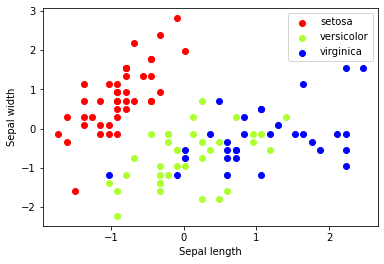

In [5]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train[:, 0][y_train == i]
    py = X_train[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Setting up the classifier

In [6]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)

SGDClassifier()

Here we have taken the default arguements of the classifier's hyperparameters. You can tune these using a validation dataset to get the best out of the model.

In [7]:
# print learned coeficients
print (clf.coef_)
print (clf.intercept_)

[[-32.02904763  20.11274605]
 [ -3.33064359  -4.52053378]
 [  5.73210799  -2.05945314]]
[-16.93465007  -3.52738017  -3.72505152]


<b>coef_</b>: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features) Weights assigned to the features. <br>
<b>intercept_</b>: ndarray of shape (1,) if n_classes == 2 else (n_classes,) Constants in decision function.



Let us create a reduced version of this Iris dataset consisting of only two classes and see how the coef_ and intercept_ features differ in shape.

In [8]:
indices = np.where(y_train!=2)
X_train_binary, y_train_binary = X_train[indices], y_train[indices]

indices = np.where(y_test!=2)
X_test_binary, y_test_binary = X_test[indices], y_test[indices]

clf_binary = SGDClassifier()
# fit (train) the classifier
clf_binary.fit(X_train_binary, y_train_binary)

# print learned coeficients
print (clf_binary.coef_)
print (clf_binary.intercept_)

[[ 35.06694989 -16.85083753]]
[23.85341666]


<b>Why does our (non binary dataset related) coefficient matrix have three rows?</b><br>
It is facing a three-class problem, not a binary decision problem.

The three rows of the coef matrix represent the three linear classifier lines, one for each class. Similarly the three intercept values are the constants for each of the three linear classifier boundaries.

The classifier converts the problem into three binary classification problems in a one-versus-all setting (it proposes three lines that separate a class from the rest).
<br>

We will continue working on the full non binary classification dataset.

## Visualising the data class boundaries

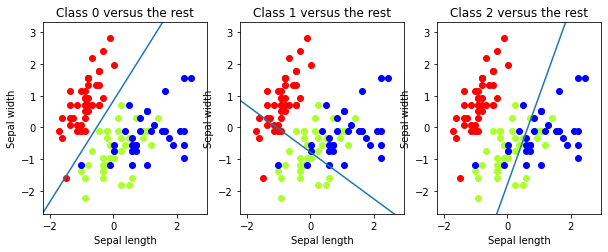

In [9]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    sca(axes[i])
    for j in range(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    # equation of a line
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys)
plt.show()

## Evaluation

In [10]:
#Evaluate a particular instance
print (clf.predict(scaler.transform([[4.7, 3.1]])))

#If our classifier is right, this Iris flower is a setosa.


#we will select the boundary line whose distance to the
#instance is longer.
print (clf.decision_function(scaler.transform([[4.7, 3.1]])))

[0]
[[ 25.10525915   0.2856414  -11.11864809]]


The simplest performance measure is accuracy: given a classifier and an evaluation dataset, it measures the proportion of instances correctly classified by the classifier.

In [11]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print ("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))

Training accuracy:  0.8125


In [12]:
#Measure accuracy on the testing set
y_pred = clf.predict(X_test)
print ("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred))

Testing accuracy:  0.7105263157894737




Accuracy on the test set is a good performance measure when the number of instances of each class is similar, that is, we have a uniform distribution of classes.

But if you have a skewed distribution (say, 99 percent of the instances belong to one class), a classifier that always predicts the majority class could have an excellent performance in terms of accuracy despite the fact that it is an extremely naive method.


In [13]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.50      0.27      0.35        11
   virginica       0.67      0.84      0.74        19

    accuracy                           0.71        38
   macro avg       0.72      0.70      0.70        38
weighted avg       0.69      0.71      0.68        38



In [14]:
print (metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  3  8]
 [ 0  3 16]]


## Cross Validation

The usual steps for k-fold cross-validation are the following:

- Partition the dataset into k different subsets.
- Create k different models by training on k-1 subsets and testing on the remaining subset.
- Measure the performance on each of the k models and take the average measure.

Cross-validation, by default, uses accuracy as its performance measure, but we could select the measurement by passing any scorer function as an argument.

We will have to create a composite estimator made by a pipeline of the standardization and linear models.

With this technique, we make sure that each iteration will standardize the data and then train/test on the transformed data.

The Pipeline class is also useful to simplify the construction of more complex models that chain-multiply the transformations.


In [15]:
#Create a new classifier: a pipeline of the standarizer and the linear model. 
#Measure the cross-validation accuracy.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold croos validation iterator of k=5 folds
cv = KFold(n_splits=5, random_state=33, shuffle=True)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print (scores)

[0.56666667 0.7        0.7        0.86666667 0.86666667]


In [16]:
#Calculate the mean and standard error of cross-validation accuracy

from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print (mean_score(scores))

Mean score: 0.740 (+/-0.057)


## Task <br>
Use all of the above as well as  any more tricks you can find on the wine dataset and try to get as good a metric value as you can.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [43]:
%pylab inline
#Populating the interactive namespace from numpy and matplotlib
#Import scikit-learn, numpy and pyplot
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [44]:
#Load wine dataset
from sklearn import datasets
wine = datasets.load_wine()
X_wine, y_wine = wine.data, wine.target
print(X_wine.shape, y_wine.shape)
print( X_wine[0], y_wine[0])

(178, 13) (178,)
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] 0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_wine, y_wine
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)

(133, 13) (133,)


## Standarize the features

In [46]:
#For each feature, calculate the average, subtract the mean
#value from the feature value, and divide the result by their standard deviation. After
#scaling, each feature will have a zero average, with a standard deviation of one.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## Setting up the classifier

In [47]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)

SGDClassifier()

In [48]:
# print learned coeficients
print (clf.coef_)
print (clf.intercept_)

[[ 2.95897687e+01  1.38553586e+01  3.51033778e+01 -2.82072584e+01
  -8.32417846e+00  8.42010721e+00  4.36178742e+00 -1.19046772e+00
   8.19166788e-01 -3.00420720e+00 -5.46827298e+00  2.36792386e+01
   2.76900047e+01]
 [-2.80374566e+01 -2.39624064e+01 -1.58811600e+01  2.01079292e+01
   1.59069195e+01 -4.47269693e-02  2.32889862e+01  1.20326327e+01
   6.87929374e-01 -4.59421969e+01  2.11354736e+01 -2.74072639e+00
  -3.78238994e+01]
 [ 9.52700887e-01  8.57849958e+00  1.87573208e+01  4.23618400e+00
  -6.68031784e+00 -8.67008828e+00 -2.99937671e+01 -7.64347031e+00
  -1.12386056e+01  2.65514112e+01 -1.17355834e+01 -1.24285492e+01
   8.93904483e-01]]
[-50.26172415 -17.03052513 -54.65145018]


<b>coef_</b>: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features) Weights assigned to the features. <br>
<b>intercept_</b>: ndarray of shape (1,) if n_classes == 2 else (n_classes,) Constants in decision function.



Let us create a reduced version of this wine dataset consisting of only two classes and see how the coef_ and intercept_ features differ in shape.

## Evaluation

The simplest performance measure is accuracy: given a classifier and an evaluation dataset, it measures the proportion of instances correctly classified by the classifier.

In [49]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print ("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))

Training accuracy:  0.9924812030075187


In [51]:
#Measure accuracy on the testing set
y_pred = clf.predict(X_test)
print ("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred))

Testing accuracy:  0.9333333333333333




Accuracy on the test set is a good performance measure when the number of instances of each class is similar, that is, we have a uniform distribution of classes.

But if you have a skewed distribution (say, 99 percent of the instances belong to one class), a classifier that always predicts the majority class could have an excellent performance in terms of accuracy despite the fact that it is an extremely naive method.


In [40]:
print (metrics.classification_report(y_test, y_pred, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.89      1.00      0.94        17
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



In [55]:
print (metrics.confusion_matrix(y_test, y_pred))

[[12  2  0]
 [ 0 17  0]
 [ 0  1 13]]


## Cross Validation

The usual steps for k-fold cross-validation are the following:

- Partition the dataset into k different subsets.
- Create k different models by training on k-1 subsets and testing on the remaining subset.
- Measure the performance on each of the k models and take the average measure.

Cross-validation, by default, uses accuracy as its performance measure, but we could select the measurement by passing any scorer function as an argument.

We will have to create a composite estimator made by a pipeline of the standardization and linear models.

With this technique, we make sure that each iteration will standardize the data and then train/test on the transformed data.

The Pipeline class is also useful to simplify the construction of more complex models that chain-multiply the transformations.


In [56]:
#Create a new classifier: a pipeline of the standarizer and the linear model. 
#Measure the cross-validation accuracy.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold croos validation iterator of k=5 folds
cv = KFold(n_splits=5, random_state=33, shuffle=True)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print (scores)

[0.94444444 0.97222222 1.         1.         0.94285714]


In [57]:
#Calculate the mean and standard error of cross-validation accuracy

from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print (mean_score(scores))

Mean score: 0.972 (+/-0.013)
